In [13]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import cmasher as cmr
import numpy as np
import math
import re
from db_connect.utils import DbConnect

In [14]:
HOST = "local.data-workshop.workshops.utkusarioglu.com"
PORT = 5432
DB_NAME = "social_shopping"
USER = "postgres"
PASSWORD = "postgres"

db = DbConnect(HOST, PORT, DB_NAME, USER, PASSWORD)

In [15]:
raw = db.query("SELECT * FROM public.raw_data")
raw.set_index(raw["segment_description"])
raw

,id,index,question,segment_type,segment_description,answer,count,percentage
0,1,0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,2,1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,3,2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,4,3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,5,4,What social platform has influenced your onlin...,Mobile,Global results,None,947,0.354
...,...,...,...,...,...,...,...,...
1445,1446,1445,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Facebook,215,0.180
1446,1447,1446,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Instagram,354,0.297
1447,1448,1447,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Snapchat,44,0.037
1448,1449,1448,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Twitter,88,0.074


In [4]:
raw[raw["segment_type"] == "Custom"]["segment_description"].unique()

array(['guys, 5\'5" girls) Tall',
       'guys, 5\'5" girls) Medium (± 3 inches)',
       'guys, 5\'5" girls) Short', 'or private school? Private',
       'games a lot? Yes, console mostly',
       'your parents make? Upper class (> $240K)',
       'your parents make? Upper-middle class (~$160K',
       'your parents make? Middle / lower-middle class (~$90K)',
       'your parents make? Poor (< ~$50K) 😁',
       "What's your major? ME/EE/other engineer",
       'or private school? No school', 'or private school? Public',
       'you vote for? Donald Trump', 'you vote for? Hillary Clinton',
       "What's your major? Business/Econ/Finance",
       "What's your major? Pre-med", 'closely identify as? Asian',
       'Are you? None/Other', 'Are you? Jewish',
       'Are you a? SVB team member', 'Are you a? Student Trekker',
       'you a feminist? No', 'you a feminist? Yes', 'Are you single? No',
       'Are you single? Yes', 'student loan debt? No',
       'student loan debt? Yes', 'you a 

<AxesSubplot: ylabel='count'>

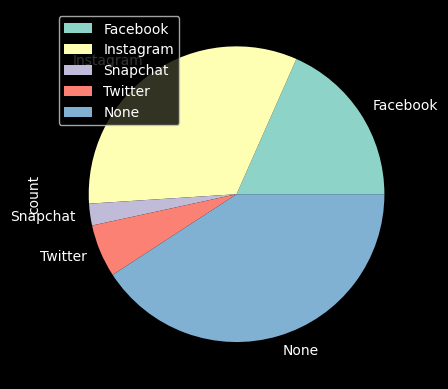

In [5]:
segment_description = "guys, 5'5\" girls) Tall"
segment_type = "Custom"
tall = raw[
    (raw["segment_type"] == segment_type)
    & (raw["segment_description"] == segment_description)
]
tall[["answer", "count"]].set_index(tall["answer"]).plot.pie(y="count")

# Social media influence on zodiac signs

In [6]:
def sanitizeZodiac(s: str):
    return re.search(".*\? (.+) \(.*", s).group(1)


zodiac_rows = raw[raw["segment_description"].str.contains("zodiac")].copy()
zodiac_rows["zodiac_sign"] = zodiac_rows["segment_description"].apply(sanitizeZodiac)
zodiac_rows[["zodiac_sign", "answer", "count", "percentage"]]

,zodiac_sign,answer,count,percentage
1075,Capricorn,Facebook,5,0.057
1076,Capricorn,Instagram,33,0.375
1077,Capricorn,Snapchat,2,0.023
1078,Capricorn,Twitter,3,0.034
1079,Capricorn,None,45,0.511
1080,Sagittarius,Facebook,11,0.131
1081,Sagittarius,Instagram,26,0.310
1082,Sagittarius,Snapchat,2,0.024
1083,Sagittarius,Twitter,11,0.131
1084,Sagittarius,None,34,0.405


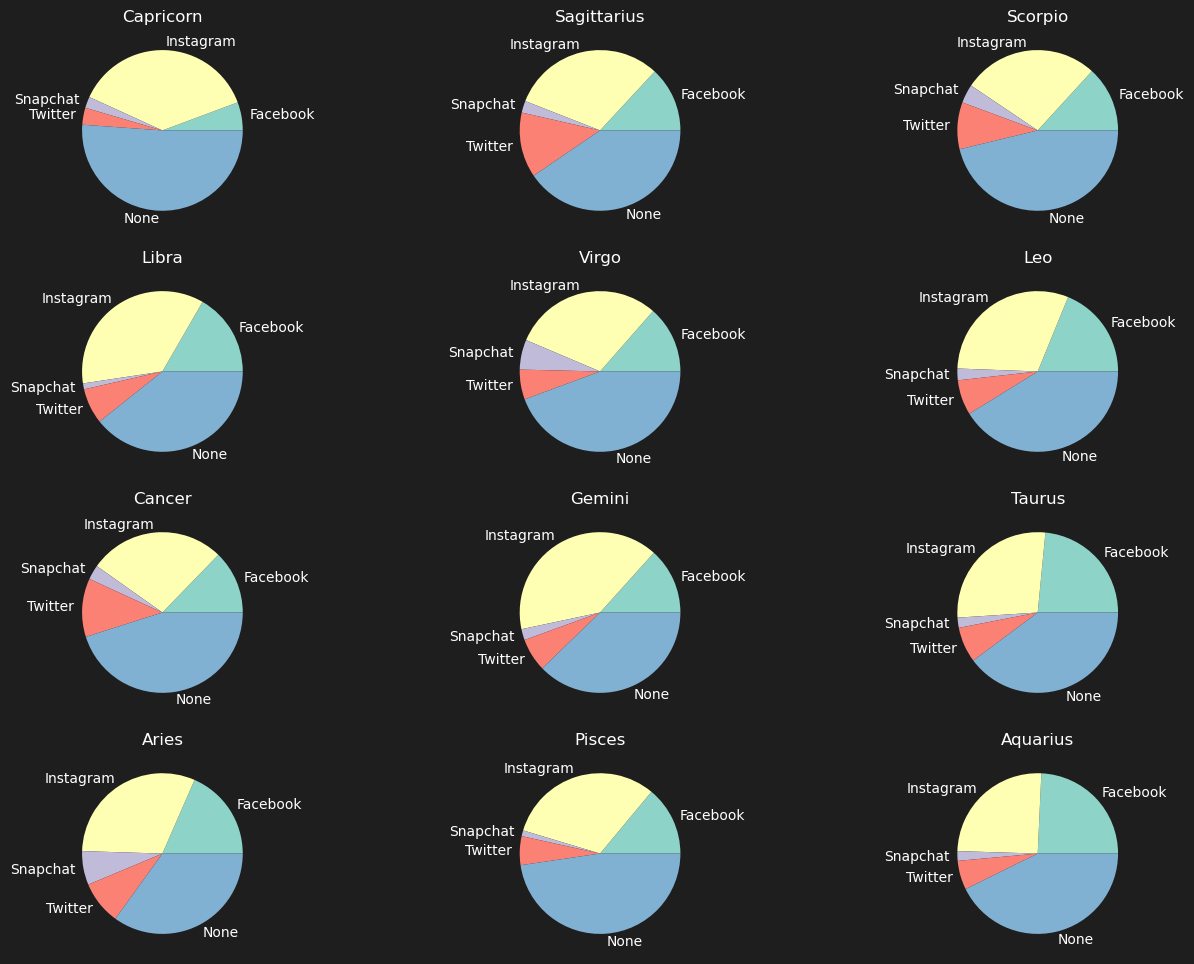

In [7]:
signs = zodiac_rows["zodiac_sign"].unique()
col_count = 3
row_count = math.ceil(len(signs) / col_count)
pie_size = 4

fig, axs = plt.subplots(row_count, col_count)
fig.set_facecolor("#1e1e1e")
fig.set_size_inches(row_count * pie_size, col_count * pie_size)

for i, sign in enumerate(signs):
    capricorn = zodiac_rows[zodiac_rows["zodiac_sign"] == sign].copy()
    capricorn.set_index(capricorn["answer"])

    ax = axs[i // col_count][i % col_count]
    ax.pie(x=capricorn["count"], labels=list(capricorn["answer"]))
    ax.title.set_text(sign)

In [21]:
mac_pc = db.query("SELECT * FROM public.responses_full")
mac_pc.loc[mac_pc["segment_description"].str.contains("Sexual")]

,id,answer,question,segment_description,segment_subdescription,count,percentage
1055,1056,Facebook,What social platform has influenced your onlin...,Sexual orientation?,Confused,13,0.277
1056,1057,Instagram,What social platform has influenced your onlin...,Sexual orientation?,Confused,18,0.383
1057,1058,Snapchat,What social platform has influenced your onlin...,Sexual orientation?,Confused,1,0.021
1058,1059,Twitter,What social platform has influenced your onlin...,Sexual orientation?,Confused,2,0.043
1059,1060,None,What social platform has influenced your onlin...,Sexual orientation?,Confused,13,0.277
1060,1061,Facebook,What social platform has influenced your onlin...,Sexual orientation?,Bi,17,0.205
1061,1062,Instagram,What social platform has influenced your onlin...,Sexual orientation?,Bi,35,0.422
1062,1063,Snapchat,What social platform has influenced your onlin...,Sexual orientation?,Bi,2,0.024
1063,1064,Twitter,What social platform has influenced your onlin...,Sexual orientation?,Bi,7,0.084
1064,1065,None,What social platform has influenced your onlin...,Sexual orientation?,Bi,22,0.265
